# 第5章

## 40.

In [1]:
from collections import namedtuple

Morph = namedtuple('Morph', ['surface', 'base', 'pos', 'pos1'])

ai = []

with open('out/ai.ja.txt.parsed') as f:
    lf = False
    sentence = []
    for l in f:
        if l.startswith('*'):
            continue
        elif l == '\n':
            lf = True
        elif l == 'EOS\n':
            lf = False
            if sentence:
                ai.append(sentence)
                sentence = []
        else:
            if lf:
                l = '\n' + l
                lf = False
            l = l.rstrip()
            surface, info_ = l.split('\t')
            info = info_.split(',')
            base = info[4]
            pos = info[0]
            pos1 = info[1]
            sentence.append(Morph(
                surface=surface,
                base=base,
                pos=pos,
                pos1=pos1
            ))

print(ai)

), Morph(surface='で', base='*', pos='助詞', pos1='格助詞'), Morph(surface='の', base='*', pos='助詞', pos1='連体化'), Morph(surface='「', base='*', pos='記号', pos1='括弧開'), Morph(surface='不完全性', base='*', pos='名詞', pos1='一般'), Morph(surface='」', base='*', pos='記号', pos1='括弧閉'), Morph(surface='について', base='*', pos='助詞', pos1='格助詞'), Morph(surface='の', base='*', pos='助詞', pos1='連体化'), Morph(surface='定理', base='*', pos='名詞', pos1='一般'), Morph(surface='で', base='*', pos='助詞', pos1='格助詞'), Morph(surface='は', base='*', pos='助詞', pos1='係助詞'), Morph(surface='ない', base='特殊・ナイ', pos='助動詞', pos1='*'), Morph(surface='。', base='*', pos='記号', pos1='句点')], [Morph(surface='科学', base='*', pos='名詞', pos1='一般'), Morph(surface='と', base='*', pos='助詞', pos1='並立助詞'), Morph(surface='哲学', base='*', pos='名詞', pos1='一般')], [Morph(surface='『', base='*', pos='記号', pos1='括弧開'), Morph(surface='科学', base='*', pos='名詞', pos1='一般'), Morph(surface='を', base='*', pos='助詞', pos1='格助詞'), Morph(surface='語る', base='五段・ラ行', pos='動詞', pos1

## 41.

In [2]:
Chunk = namedtuple('Chunk', ['morphs', 'dst', 'srcs'])

ai = []

with open('out/ai.ja.txt.parsed') as f:
    lf = False
    sentence = []
    chunk = None
    for l in f:
        if l.startswith('*') or l == 'EOS\n':
            if chunk:
                sentence.append(chunk)
                chunk = None
        if l.startswith('*'):
            morphs = []
            info = l.rstrip().split(' ')
            assert info[2][-1] == 'D'
            dst = int(info[2][:-1])
            chunk = Chunk(morphs=morphs, dst=dst, srcs=[])
        elif l == '\n':
            lf = True
        elif l == 'EOS\n':
            lf = False
            if sentence:
                for i, c in enumerate(sentence):
                    if c.dst != -1:
                        sentence[c.dst].srcs.append(i)
                ai.append(sentence)
                sentence = []
        else:
            if lf:
                l = '\n' + l
                lf = False
            l = l.rstrip()
            surface, info_ = l.split('\t')
            info = info_.split(',')
            base = info[6]
            pos = info[0]
            pos1 = info[1]
            morphs.append(Morph(
                surface=surface,
                base=base,
                pos=pos,
                pos1=pos1
            ))

print(ai)

一般'), Morph(surface='の', base='の', pos='助詞', pos1='連体化')], dst=19, srcs=[]), Chunk(morphs=[Morph(surface='細分', base='細分', pos='名詞', pos1='サ変接続'), Morph(surface='化', base='化', pos='名詞', pos1='接尾'), Morph(surface='そのもの', base='そのもの', pos='名詞', pos1='一般'), Morph(surface='」', base='」', pos='記号', pos1='括弧閉'), Morph(surface='で', base='だ', pos='助動詞', pos1='*'), Morph(surface='あり', base='ある', pos='助動詞', pos1='*'), Morph(surface='、', base='、', pos='記号', pos1='読点')], dst=24, srcs=[18]), Chunk(morphs=[Morph(surface='「', base='「', pos='記号', pos1='括弧開'), Morph(surface='立派', base='立派', pos='名詞', pos1='形容動詞語幹'), Morph(surface='な', base='だ', pos='助動詞', pos1='*')], dst=21, srcs=[]), Chunk(morphs=[Morph(surface='進歩', base='進歩', pos='名詞', pos1='サ変接続'), Morph(surface='」', base='」', pos='記号', pos1='括弧閉'), Morph(surface='だ', base='だ', pos='助動詞', pos1='*'), Morph(surface='と', base='と', pos='助詞', pos1='格助詞')], dst=24, srcs=[20]), Chunk(morphs=[Morph(surface='宇宙', base='宇宙', pos='名詞', pos1='一般'), Morph(surface

## 42.

In [3]:
for s in ai:
    for c in s:
        if c.dst == -1:
            continue
        src = ''.join(m.surface for m in c.morphs if m.pos != '記号')
        dst = ''.join(m.surface for m in s[c.dst].morphs if m.pos != '記号')
        print(f'{src}\t{dst}')

16年	10月
10月	開発
DeepMindが	発表し
入力された	情報の
情報の	関連性を
関連性を	導き出し
導き出し	導き出す
仮説に	近い
近い	ものを
ものを	導き出す
導き出す	人工知能技術
人工知能技術	ディファレンシャブル・ニューラル・コンピューターを
ディファレンシャブル・ニューラル・コンピューターを	発表し
発表し	開発
同年	11月
11月	開発
大量の	データが
データが	可能にする
不要の	ワンショット学習を
ワンショット学習を	可能にする
可能にする	深層学習システムを
深層学習システムを	開発
翌2017年	6月
6月	開発
関係推論のような	人間並みの
人間並みの	認識能力を
認識能力を	持つ
持つ	システムを
システムを	開発
開発	解決した
2017年	8月には
8月には	解決した
記号接地問題(シンボルグラウンディング問題)を	解決した
2006年の	ディープラーニングの
ディープラーニングの	発明と
発明と	整備
2010年以降の	ビッグデータ収集環境の
ビッグデータ収集環境の	整備
整備	高性能化により
計算資源と	なる
なる	GPUの
GPUの	高性能化により
高性能化により	優勝した
2012年に	優勝した
ディープラーニングが	優勝した
画像処理コンテストで	付けて
他の	手法に
手法に	付けて
圧倒的大差を	付けて
付けて	優勝した
優勝した	ことで
ことで	受け止められるようになった
技術的特異点という	概念は
概念は	受け止められるようになった
急速に	集め
世界中の	識者の
識者の	注目を
注目を	集め
集め	受け止められるようになった
現実味を	持って
持って	受け止められるようになった
受け止められるようになった	立ち上げられている
ディープラーニングの	発明と
発明と	普及を
急速な	普及を
普及を	受けて
受けて	立ち上げられている
研究開発の	現場においては
現場においては	立ち上げられている
デミス・ハサビス	率いる
率いる	DeepMindを
DeepMindを	筆頭に
筆頭に	立ち上げられている
Vicarious	IBMCorticalLearningCenter
IBMCorticalLearningCenter	全脳アーキテクチャ
全脳アーキテクチャ	PEZYComputing
PEZY

## 43.

In [4]:
for s in ai:
    for c in s:
        if c.dst == -1:
            continue
        if not any(m.pos == '名詞' for m in c.morphs):
            continue
        if not any(m.pos == '動詞' for m in s[c.dst].morphs):
            continue
        src = ''.join(m.surface for m in c.morphs if m.pos != '記号')
        dst = ''.join(m.surface for m in s[c.dst].morphs if m.pos != '記号')
        print(f'{src}\t{dst}')

道具を	用いて
知能を	研究する
一分野を	指す
知的行動を	代わって
人間に	代わって
コンピューターに	行わせる
研究分野とも	される
解説で	述べている
佐藤理史は	述べている
次のように	述べている
知的能力を	実現する
コンピュータ上で	実現する
技術ソフトウェアコンピュータシステム	ある
応用例は	ある
推論判断を	模倣する
画像データを	解析して
解析して	検出抽出したりする
パターンを	検出抽出したりする
画像認識等が	ある
1956年に	命名された
ダートマス会議で	命名された
ジョンマッカーシーにより	命名された
命名された	使われている
現在では	使われている
記号処理を	用いた
記述を	する
主体と	する
意味あいでも	使われている
思考ルーチンも	呼ばれる
ことも	ある
カウンセラーを	模倣した
プログラム	出されるが
人工無脳が	出されるが
引き合いに	出されるが
計算機に	させようという
役割を	させようという
エキスパートシステムと	呼ばれる
実現は	困難視されている
人間が	持つ
暗黙に	持つ
記述が	なり
問題と	なり
利用が	困難視されている
困難視されている	ある
アプローチとしては	知られているが
アプローチも	知られているが
差は	ある
記号的明示性に	ある
その後	集めた
サポートベクターマシンが	集めた
注目を	集めた
経験を	行う
元に	行う
学習を	行う
手法も	ある
宇宙において	実装するという
言葉通り	実装するという
知性を	表現し
機械的に	表現し
表現し	実装するという
登場により	行った
流行を	超えて
社会に	浸透して
浸透して	行った
2017年にかけて	導入した
ディープラーニングを	導入した
プレイヤーも	破り
麻雀では	なった
MicrosoftSuphx(SuperPhoenix)」が	到達するなど
AIとして	到達するなど
十段に	到達するなど
到達するなど	なった
最先端技術と	なった
人工知能は	呼ばれ
機械学習と	呼ばれ
ものが	ある
学習を	繰り返す
ことを	している
基本と	している
システム	関係している
経験に	基づく
手法であり	関係している
ソフトコンピューティングと	関係している
関係している	ある
手法としては	ある
ものが	ある
これらを	統合した
知的システムを	

## 44.

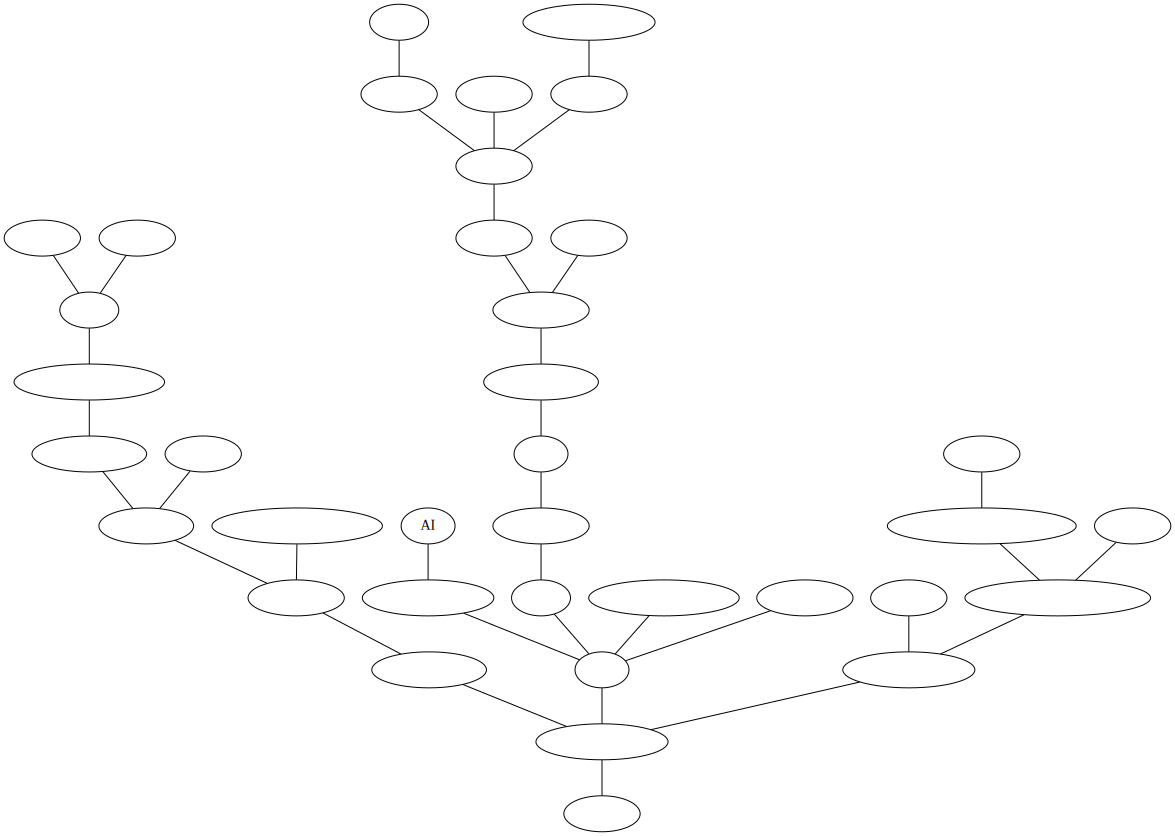

In [5]:
import graphviz

def viz(sentence):
    g = graphviz.Graph()
    for i, c in enumerate(sentence):
        label = ''.join(m.surface for m in c.morphs if m.pos != '記号')
        g.node(str(i), label=label)
        if c.dst == -1:
            continue
        g.edge(str(i), str(c.dst))
    return g

viz(ai[1])

## 45.

In [6]:
tally = dict()

for s in ai:
    for c in s:
        if c.dst == -1:
            continue
        predicate = next((m.base for m in s[c.dst].morphs if m.pos == '動詞'), None)
        if not predicate:
            continue
        particles = set(m.base for m in c.morphs if m.pos == '助詞')
        if predicate not in tally:
            tally[predicate] = []
        tally[predicate].extend(particles)

for predicate, particles in tally.items():
    print(f'{predicate}\t{" ".join(sorted(particles))}')

用いる	から が が て て で として として に にかけて のみ は は は は まで も を を を を を を を
する	か から から から から から から から から から から が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が さえ ずつ だけ つつ て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て で で で で で で で で で で で で で で で で で で で で で で で で で で で で で で で で で で で で で で で で で で で で で で で で で で と と と と と と と と と と と と と と と と と と と と と と と と と と と と と と と と と と と と と と と と と と と と と と と と と と と と という として として として として として として として として として として として として どころか など など など など など など など に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に において において において において において において にかけて について について について につれて にとって によって によって により により により により により に対し に対して の は は は は は は は は は は は は は は は は は は は は は は 

## 46.

In [7]:
tally = dict()

for s in ai:
    for c in s:
        if c.dst == -1:
            continue
        predicate = next((m.base for m in s[c.dst].morphs if m.pos == '動詞'), None)
        if not predicate:
            continue
        particle = next((m.base for m in c.morphs if m.pos == '助詞'), None)
        if not particle:
            continue
        phrase = ''.join(m.surface for m in c.morphs)
        if predicate not in tally:
            tally[predicate] = []
        tally[predicate].append((particle, phrase))

for predicate, pps in tally.items():
    particles, phrases = zip(*sorted(pps))
    print(f'{predicate}\t{" ".join(particles)}\t{" ".join(phrases)}')

用いる	から が が て て で として として に にかけて のみ は は まで も を を を を を を	従来から 制御技術が 名称が 受けて、 登場している。 白物家電では 売り文句として 手法として 大々的に 中頃にかけて、 神経ネットワークのみを これは ものではなく、 中頃までは、 他社も ルールを 人工知能を 知的制御を 行動型システムを 記号処理を 道具を
する	か から から から から から から から から が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が が さえ ずつ つつ て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て て で で で で で で で で で で で で で で で で で で で で で で で で で で で で で で で で で で で で で で で で で で で で で で で で で と と と と と と と と と と と と と と と と と と と と と と と と と と と と と と と と と と と と と と と と と と と と という として として として として として として として として として として として として どころか など など など など など など など に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に に において において において において において において にかけて について について について につれて にとって によって 

## 47.

In [8]:
tally = dict()

for s in ai:
    for i, c in enumerate(s):
        if c.dst == -1:
            continue
        if len(c.morphs) != 2:
            continue
        if c.morphs[0].pos1 != 'サ変接続':
            continue
        if c.morphs[1].pos != '助詞' or c.morphs[1].surface != 'を':
            continue
        wo_phrase = ''.join(m.surface for m in c.morphs)
        verb = next((m.base for m in s[c.dst].morphs if m.pos == '動詞'), None)
        if not verb:
            continue
        predicate = wo_phrase + verb
        for src in c.srcs + s[c.dst].srcs:
            if src == i:
                continue
            particle = next((m.base for m in s[src].morphs if m.pos == '助詞'), None)
            if not particle:
                continue
            phrase = ''.join(m.surface for m in s[src].morphs)
            if predicate not in tally:
                tally[predicate] = []
            tally[predicate].append((particle, phrase))

for predicate, pps in tally.items():
    particles, phrases = zip(*sorted(pps))
    print(f'{predicate}\t{" ".join(particles)}\t{" ".join(phrases)}')

記述をする	と の	主体と 知能の
注目を集める	から が に の の は	ことから、 「サポートベクターマシン」が 急速に 世間の 識者の ファジィは
経験を行う	に の を	元に 自らの 学習を
学習を行う	に を	元に 経験を
流行を超える	の	一過性の
学習を繰り返す	や	開発や
進化を見せる	て て において は	加えて、 活躍している。 生成技術において （敵対的生成ネットワーク）は、
開発を行う	の は	機械式計算機の エイダ・ラブレスは
テストをする	に関する	知的ふるまいに関する
意味をする	に	データに
研究を進める	て の	費やして 第五世代コンピュータの
命令をする	で の	機構で Prologの
運転をする	て に に	基づいて、 元に 柔軟に
特許をする	が の まで	日本が 1/5の 2018年までに
研究をする	について	ファジィ制御についての
成功を受ける	の	試みの
制御をする	から の や	少なさから、 家電製品の 工作機械や
進歩を担う	の	科学技術の
研究を続ける	が て	ジェフ・ホーキンスが、 向けて
普及を受ける	と	発明と
投資を行う	で に	民間企業主導で 全世界的に
探索を行う	で	無報酬で
推論をする	て の	経て ニューラルネットワークの
研究を行う	て という	始めており、 再構成するという
実験をする	の や	新技術の 研究や
投資をする	は まで	韓国は、 2022年までに
反乱を起こす	て に対して	於いて、 人間に対して
弾圧を併せ持つ	と の	資金力と 人権の
監視を行う	に まで	人工知能に 歩行者まで
差別を認める	で のみ	融資での ビッグデータ分析のみによる、
展開を変える	の	部隊の
判断を介す	から の	観点から 人間の
禁止を求める	が に の	ヒューマン・ライツ・ウォッチが、 4月には 自動操縦型武器の
運用をめぐる	の	AI兵器の
記録をする	の	米軍の
試験を行う	の	世界最大規模の
追及を受ける	て で で と とともに	暴露されており、 公聴会では、 整合性で 拒否すると 「」とともに、
解任をする	て は	含まれており、 Google社員らは
解散をする	が で の は	倫理委員会が 理由で、 委員会の Googleは
実現をする	の	Godheadの
話をする	の は	異

## 48.

In [9]:
for s in ai:
    for i, c0 in enumerate(s):
        if not any(m.pos == '名詞' for m in c0.morphs):
            continue
        path = []
        ci = i
        while ci != -1:
            path.append(''.join(m.surface for m in s[ci].morphs if m.pos != '記号'))
            if any(m.pos1 == '句点' for m in s[ci].morphs):
                break
            ci = s[ci].dst
        print(' -> '.join(path))

いる -> 米国中国ロシアは -> 行っている
米国中国ロシアは -> 行っている
核開発に -> 匹敵する -> 開発競争を -> 行っている
匹敵する -> 開発競争を -> 行っている
開発競争を -> 行っている
人工知能の -> 軍事利用をめぐって -> 行っている
軍事利用をめぐって -> 行っている
中国は -> されている
2017年 -> 6月に -> 成功した -> 米軍の -> 記録を -> 更新して -> 発表し -> 進展しており -> されている
6月に -> 成功した -> 米軍の -> 記録を -> 更新して -> 発表し -> 進展しており -> されている
119機の -> ドローン群の -> 自律飛行実験で -> 成功した -> 米軍の -> 記録を -> 更新して -> 発表し -> 進展しており -> されている
ドローン群の -> 自律飛行実験で -> 成功した -> 米軍の -> 記録を -> 更新して -> 発表し -> 進展しており -> されている
自律飛行実験で -> 成功した -> 米軍の -> 記録を -> 更新して -> 発表し -> 進展しており -> されている
前年 -> 2016年に -> 103機の -> 飛行実験に -> 成功した -> 米軍の -> 記録を -> 更新して -> 発表し -> 進展しており -> されている
2016年に -> 103機の -> 飛行実験に -> 成功した -> 米軍の -> 記録を -> 更新して -> 発表し -> 進展しており -> されている
103機の -> 飛行実験に -> 成功した -> 米軍の -> 記録を -> 更新して -> 発表し -> 進展しており -> されている
飛行実験に -> 成功した -> 米軍の -> 記録を -> 更新して -> 発表し -> 進展しており -> されている
成功した -> 米軍の -> 記録を -> 更新して -> 発表し -> 進展しており -> されている
米軍の -> 記録を -> 更新して -> 発表し -> 進展しており -> されている
記録を -> 更新して -> 発表し -> 進展しており -> されている
更新して -> 発表し -> 進展しており -> されている
2018年 -> 5月

## 49.

In [17]:
from itertools import combinations

for s in ai:
    paths = []
    for i, c0 in enumerate(s):
        if not any(m.pos == '名詞' for m in c0.morphs):
            continue
        path = []
        ci = i
        while ci != -1:
            path.append(ci)
            if any(m.pos1 == '句点' for m in s[ci].morphs):
                break
            ci = s[ci].dst
        paths.append((i, path))
    for (i, p0), (j, p1) in combinations(paths, 2):
        if j in p0:
            phrases = []
            phrases.append(''.join('X' if m.pos == '名詞' else m.surface for m in s[i].morphs if m.pos != '記号'))
            for ci in p0[1:p0.index(j)]:
                phrases.append(''.join(m.surface for m in s[ci].morphs if m.pos != '記号'))
            phrases.append(''.join('Y' if m.pos == '名詞' else m.surface for m in s[j].morphs if m.pos != '記号'))
            print(' -> '.join(phrases))
            continue
        for k in p0:
            if k in p1:
                phrases0 = []
                phrases0.append(''.join('X' if m.pos == '名詞' else m.surface for m in s[i].morphs if m.pos != '記号'))
                for ci in p0[1:p0.index(k)]:
                    phrases0.append(''.join(m.surface for m in s[ci].morphs if m.pos != '記号'))
                phrases1 = []
                phrases1.append(''.join('Y' if m.pos == '名詞' else m.surface for m in s[j].morphs if m.pos != '記号'))
                for ci in p1[1:p1.index(k)]:
                    phrases1.append(''.join(m.surface for m in s[ci].morphs if m.pos != '記号'))
                phrasek = ''.join(m.surface for m in s[k].morphs if m.pos != '記号')
                print(' | '.join([' -> '.join(phrases0), ' -> '.join(phrases1), phrasek]))
                break

X -> Yな
X -> 不能な -> Yの
X -> 不能な -> 命題の -> Yであり
X -> 不能な -> 命題の -> 存在であり | YYな -> 意味での -> 不完全性についての | 定理ではない
X -> 不能な -> 命題の -> 存在であり | Yでの -> 不完全性についての | 定理ではない
X -> 不能な -> 命題の -> 存在であり | Yについての | 定理ではない
X -> 不能な -> 命題の -> 存在であり -> Yではない
Xな -> Yの
Xな -> 命題の -> Yであり
Xな -> 命題の -> 存在であり | YYな -> 意味での -> 不完全性についての | 定理ではない
Xな -> 命題の -> 存在であり | Yでの -> 不完全性についての | 定理ではない
Xな -> 命題の -> 存在であり | Yについての | 定理ではない
Xな -> 命題の -> 存在であり -> Yではない
Xの -> Yであり
Xの -> 存在であり | YYな -> 意味での -> 不完全性についての | 定理ではない
Xの -> 存在であり | Yでの -> 不完全性についての | 定理ではない
Xの -> 存在であり | Yについての | 定理ではない
Xの -> 存在であり -> Yではない
Xであり | YYな -> 意味での -> 不完全性についての | 定理ではない
Xであり | Yでの -> 不完全性についての | 定理ではない
Xであり | Yについての | 定理ではない
Xであり -> Yではない
XXな -> Yでの
XXな -> 意味での -> Yについての
XXな -> 意味での -> 不完全性についての -> Yではない
Xでの -> Yについての
Xでの -> 不完全性についての -> Yではない
Xについての -> Yではない
Xと -> Y
Xを -> 語るとは -> Yかに
Xを -> 語るとは -> ことかに -> よると | Yの -> 扱う -> 問題が -> 整理され -> 分化した -> ことで | 研究するようになった
Xを -> 語るとは -> ことかに -> よると | Yが -> 整理され -> 分化した -> ことで | 研究するようになった
Xを -> 語るとは 